In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    fig, ax = plt.subplots(figsize=(10, 10))
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Read preprocessed data

In [4]:
df = pd.read_csv("../data/features_whaleAcoustics.csv",sep=";")

In [5]:
df.shape

(4136, 7)

In [6]:
df.columns

Index(['Label', 'Zero crossing rate', 'total energy', 'Standard deviation',
       'Spectral centroid', 'Spectral rolloff', 'Spectral flatness'],
      dtype='object')

In [7]:
df.describe()

,Zero crossing rate,total energy,Standard deviation,Spectral centroid,Spectral rolloff,Spectral flatness
count,4136.000000,4136.000000,4136.000000,4136.000000,4136.000000,4136.000000
mean,816.682785,0.002914,0.042800,847.447952,1910.964262,0.002342
std,513.960181,0.005657,0.032859,476.075794,497.953299,0.002780
min,135.000000,0.000090,0.009505,351.881857,1149.463719,0.000219
25%,422.000000,0.000385,0.019624,419.633251,1498.164691,0.000319
50%,624.000000,0.001418,0.037621,753.668599,1648.431776,0.000705
75%,1156.000000,0.002398,0.048946,1487.300377,2456.916190,0.005416
max,2930.000000,0.079841,0.282547,1723.784407,2848.888208,0.008681


In [8]:
classes = set(df["Label"])

In [9]:
classes

{'Class A', 'Class B', 'Class C'}

In [10]:
randomSubsample1000 = pd.DataFrame()
for label in classes:
    try:
        randomSubsample1000 = randomSubsample1000.append(df[df["Label"]==label].sample(1000))
    except: 
        print(f'Problems with label {label}')

In [11]:
df=randomSubsample1000

In [12]:
df.groupby("Label").count()

,Zero crossing rate,total energy,Standard deviation,Spectral centroid,Spectral rolloff,Spectral flatness
Label,,,,,,
Class A,1000,1000,1000,1000,1000,1000
Class B,1000,1000,1000,1000,1000,1000
Class C,1000,1000,1000,1000,1000,1000


### Apply a scaler and split to test and train data

In [13]:
predictors = df.iloc[:,1:]

In [14]:
predictors

,Zero crossing rate,total energy,Standard deviation,Spectral centroid,Spectral rolloff,Spectral flatness
2287,437,0.002517,0.050166,760.269449,2664.741167,0.000518
2753,735,0.000135,0.011620,391.283706,1433.402322,0.000315
3269,799,0.000099,0.009955,363.862466,1246.866276,0.000340
3058,561,0.000190,0.013780,425.101627,1332.719225,0.000638
2722,346,0.000712,0.026656,413.473178,1617.907572,0.000263
3022,723,0.000116,0.010766,412.210293,1457.412797,0.000325
2567,317,0.000363,0.019041,430.831776,1642.951077,0.000267
1874,1137,0.002925,0.054057,1460.904463,1454.179373,0.005673
4093,1577,0.001346,0.036680,1603.230814,2217.254240,0.007740
2861,659,0.000212,0.014556,457.659700,1530.016753,0.000318


In [15]:
transformer = StandardScaler().fit(predictors)
transformer

/opt/miniconda3/envs/Anaconda-Python3.6/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [16]:
predictors = transformer.transform(predictors)

/opt/miniconda3/envs/Anaconda-Python3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [17]:
X_train, X_test, y_train, y_test = train_test_split(
predictors, df["Label"]) #, random_state=0)

### Simple k-neighbors

In [18]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.77


Normalized confusion matrix


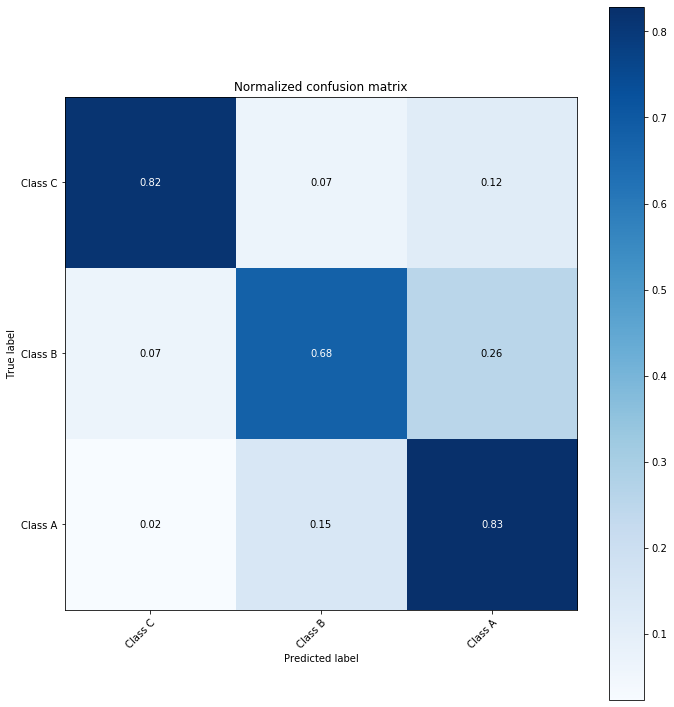

In [19]:
y_pred = knn.predict(X_test)
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=classes, normalize=True,
                      title='Normalized confusion matrix')

#### Grid search to find a good value for N

In [20]:
#%%time

best_score = 0
best_knn = None

for n in range(1,20,1):
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
   
    score = knn.score(X_test, y_test)
  
    if score > best_score:
        best_score = score
        best_parameters = {'N': n}
        best_knn = knn

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.81
Best parameters: {'N': 1}


Normalized confusion matrix


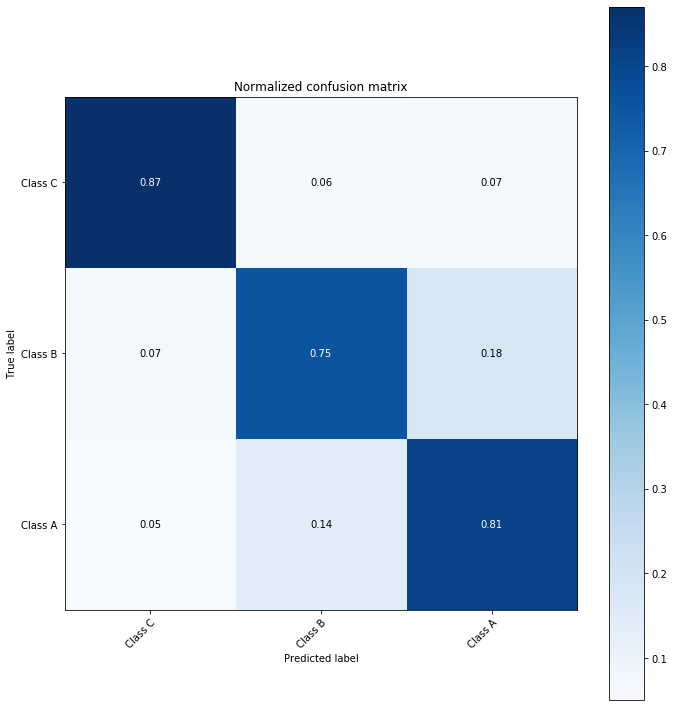

In [21]:
y_pred = best_knn.predict(X_test)
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=classes, normalize=True,
                      title='Normalized confusion matrix')

### Decision tree

In [22]:
#%%time

best_score = 0
best_tree = None

for n in range(1,30,3):
    tree = DecisionTreeClassifier(max_depth=n, random_state=0)
    tree.fit(X_train, y_train)
   
    score = tree.score(X_test, y_test)
  
    if score > best_score:
        best_score = score
        best_parameters = {'N': n}
        best_tree = tree

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.85
Best parameters: {'N': 19}


Normalized confusion matrix


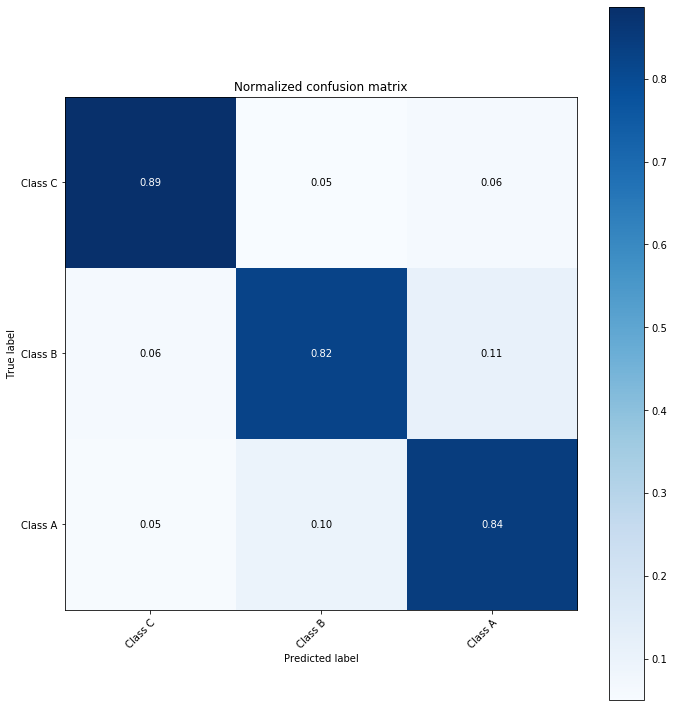

In [23]:
y_pred = best_tree.predict(X_test)
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=classes, normalize=True,
                      title='Normalized confusion matrix')

### Random Forest

In [24]:
#%%time

rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(rf.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(rf.score(X_test, y_test)))

Accuracy on training set: 0.993
Accuracy on test set: 0.860


Normalized confusion matrix


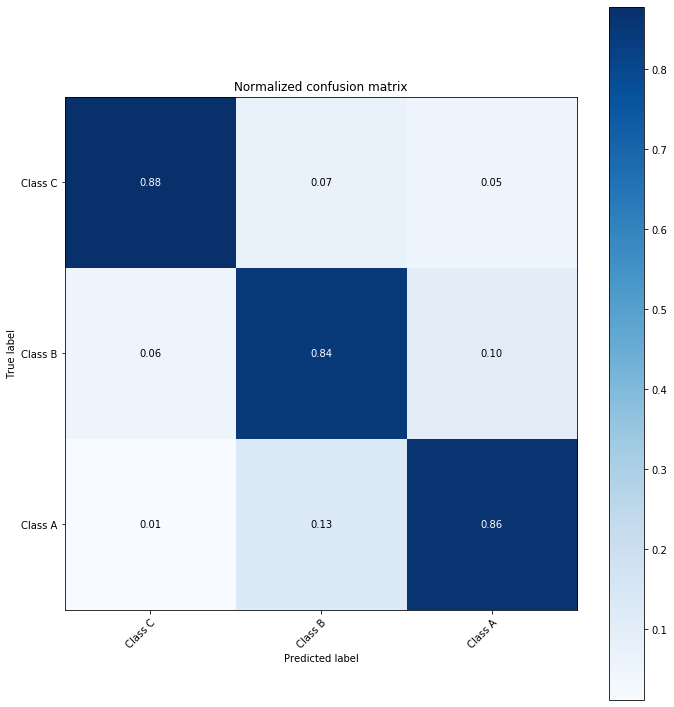

In [25]:
y_pred = rf.predict(X_test)
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=classes, normalize=True,
                      title='Normalized confusion matrix')

In [26]:
#%%time

best_score = 0
best_rf = None

for n in range(1,30,1):
    rf = RandomForestClassifier(max_depth=n, random_state=0)
    rf.fit(X_train, y_train)
   
    score = rf.score(X_test, y_test)
  
    if score > best_score:
        best_score = score
        best_parameters = {'N': n}
        best_rf = rf

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Best score: 0.88
Best parameters: {'N': 19}


Normalized confusion matrix


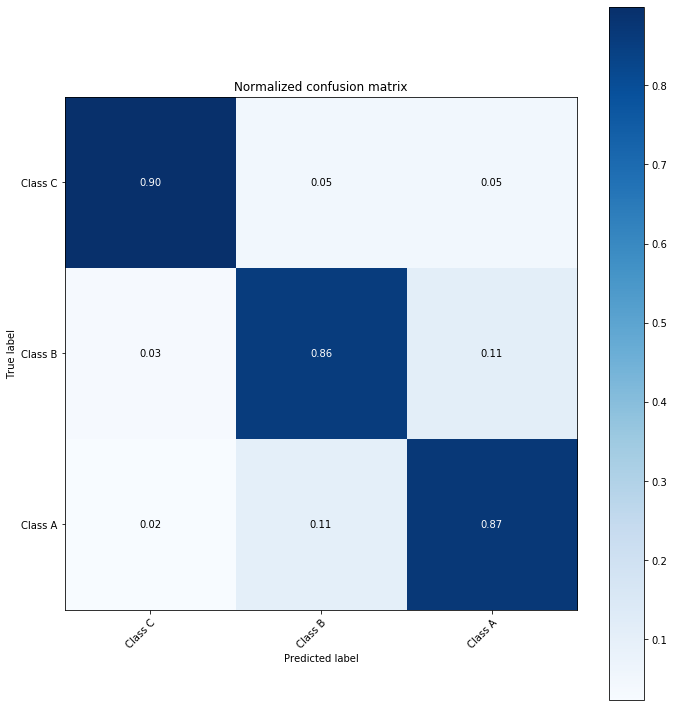

In [27]:
y_pred = best_rf.predict(X_test)
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=classes, normalize=True,
                      title='Normalized confusion matrix')

### Supported vector machine

TODO

### Multi layer perceptron

In [28]:
mlp = MLPClassifier(solver='lbfgs',alpha=1e-5,hidden_layer_sizes=(5,2))

mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(5, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [29]:
mlp.score(X_test,y_test)

0.7106666666666667

Normalized confusion matrix


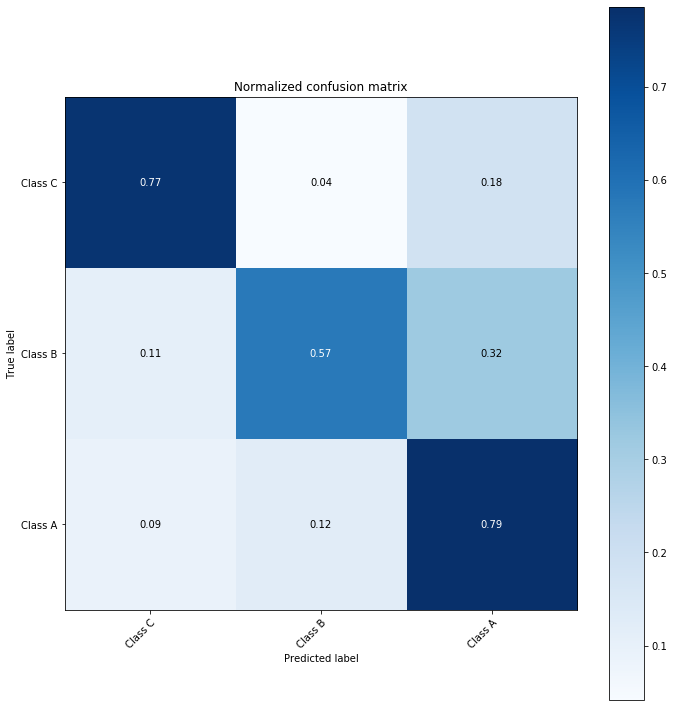

In [32]:
y_pred = mlp.predict(X_test)
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=classes, normalize=True,
                      title='Normalized confusion matrix')